# Fisher线性判别函数法

## 实验原理
        在ω1、ω2两类问题中，假定有n个训练样本Xk(k=1，2，...，n)，其中n1个来自类型ω1的抽样试验，n2个来自类型ω2的抽样试验，n=n1+n2。两个类型ω1和ω2的训练样本分别构成训练样本的子集 X1和X2。
        令： yk==wTXk ,K=1,2,…n。式中，yk是Xk通过变换w得到的标量，它是一维的。子集X1、X2的样 本在映射后得到的两个子集为Y1、Y2。

## Fisher算法求解w*实现步骤如下：

i) 把来自两类ω1、ω2的训练样本集 分成与ω1、ω2分别对应的训练样本子集X1、X2。

ii) 计算各类样本的均值向量：

iii) 计算样本类内离散度矩阵： 

iv) 计算总类内离散度矩阵：

v) 计算Sw的逆矩阵S-1w。

vi) 求解w* =S-1w(M1-M2)。

判别函数:

In [1]:
import numpy as np
import math

### i) 把来自两类ω1、ω2的训练样本集 分成与ω1、ω2分别对应的训练样本子集  X1、X2。

In [2]:
# 2个类别的3维样本集
X1 = [
    [-0.4, 0.58, 0.089],  # w1
    [-0.31, 0.27, -0.04],
    [0.38, 0.055, -0.035],
    [-0.15, 0.53, 0.011],
    [-0.35, 0.47, 0.034],
    
    [0.17, 0.69, 0.1],
    [-0.011, 0.55, -0.18],
    [-0.27, 0.61, 0.12],
    [-0.065, 0.49, 0.0012],
    [-0.12, 0.054, -0.063],
]
    
X2 = [
    [0.83, 1.6, -0.014],  # w2
    [1.1, 1.6, 0.48], 
    [-0.44, -0.41, 0.32],
    [0.047, -0.45, 1.4], 
    [0.28, 0.35, 3.1], 
    
    [-0.39, -0.48, 0.11],
    [0.34, -0.079, 0.14], 
    [-0.3, -0.22, 2.2], 
    [1.1, 1.2, -0.46], 
    [0.18, -0.11, -0.49]
]

N=3 # 每个样本向量的维数

n=[10, 10] # 每个训练样本集里样本的个数 

In [3]:
# 测试集
test = [
    [1.40, -0.36, -0.41],
    [-0.11, 1.60, 1.51],
    [0.52, 1.30, 1.11]
]


### 计算各类样本的均值向量

In [4]:
def calc_M(X, N, n):
    """
    计算各类样本均值向量M
    X : 样本集合
    N : 样本维度
    n : 样本集合容量
    
    return ：均值向量
    """
    M=np.mat(np.zeros(N))  # 保存向量

    for i in range(N):
        sum = 0  # 统计总和
        for j in range(n):
            sum += X[j][i]
        M[0,i] = sum / n
        
    return M.T # 向量形式返回，列向量

In [5]:
M1 = calc_M(X1, N, n[0])
M2 = calc_M(X2, N, n[1])
print(" 第一类的均值向量M1：","\n",M1,"\n","第二类的均值向量M2:","\n",M2)

 第一类的均值向量M1： 
 [[-0.1126 ]
 [ 0.4299 ]
 [ 0.00372]] 
 第二类的均值向量M2: 
 [[0.2747]
 [0.3001]
 [0.6786]]


### iii) 计算样本类内离散度矩阵：

In [6]:
def calc_S(X, M, N, n):
    """
    计算样本内离散度矩阵
    X : 样本集合
    M : 各类样本的均值向量
    N : 样本维数
    n : 样本集合容量
    
    return : 样本内离散度矩阵
    """
    S = 0
    
    for i in range(n):
#        print("第", i , "次循环：")
        Xi = (np.mat(X[i])).T  # 用来表示样本向量，都是列向量
#        print("    第", i + 1, "个样本的向量表示：")
#        print(Xi)
        X_i = (Xi-M)*((Xi-M).T)  # 每个样本的方差
#        print("    第", i + 1, "个样本的方差向量表示：")
#        print(X_i)
        S += X_i
#        print("    第", i, "次的样本的类内的离散度矩阵：")
#        print(S)
        
#    print("最后的结果：")
#    print(S)
    return S    

In [7]:
S1 = calc_S(X1, M1, N, n[0])
S2 = calc_S(X2, M2, N, n[1])
print("第一类样本的类内离散度矩阵S1:\n", S1, "\n", "第二类样本的类间离散度矩阵S2:\n", S2)


第一类样本的类内离散度矩阵S1:
 [[ 0.5392584  -0.1465126  -0.05179928]
 [-0.1465126   0.4597009   0.08509872]
 [-0.05179928  0.08509872  0.07265506]] 
 第二类样本的类间离散度矩阵S2:
 [[ 3.0186081  4.0474153 -1.8042342]
 [ 4.0474153  6.4496409 -2.0130386]
 [-1.8042342 -2.0130386 12.6214164]]


### iv) 计算总类内离散度矩阵：

In [8]:
def get_Sw(S1,S2):
    return S1 + S2;

In [9]:
Sw = get_Sw(S1, S2)
print("总类内离散度矩阵：\n", Sw)

总类内离散度矩阵：
 [[ 3.5578665   3.9009027  -1.85603348]
 [ 3.9009027   6.9093418  -1.92793988]
 [-1.85603348 -1.92793988 12.69407146]]


### v) 计算Sw的逆矩阵S-1w。

In [10]:
print("Sw的逆矩阵：\n", Sw.I)

Sw的逆矩阵：
 [[ 0.76510159 -0.41848405  0.04830933]
 [-0.41848405  0.38003286 -0.00346933]
 [ 0.04830933 -0.00346933  0.08531345]]


### vi) 求解w* =S-1w(M1-M2)。

In [11]:
def get_W_star(Sw, M1, M2):
    """
    求解 W*，最优方向
    Sw : 总类内离散度矩阵
    M1 : 第一类样本的均值向量
    M2 : 第二类样本的均值向量
    
    return 矩阵W*
    """
    return Sw.I * (M1 - M2)

In [12]:
W_star = get_W_star(Sw, M1, M2)

W_star

matrix([[-0.38324607],
        [ 0.21374852],
        [-0.07673687]])

In [13]:
# 不考虑先验概率的不同
def get_W0(W_star, M1, M2):
    """
    求解W0
    W_star : W*,最优方向
    M1 : 第一类样本的均值向量
    M2 : 第二类样本的均值向量
    
    return W0
    """
    return (-1 / 2) * W_star.T * (M1 + M2)

In [14]:
W0 = get_W0(W_star, M1, M2)
W0

matrix([[-0.02077657]])

In [15]:
def dist_g(W_star, W0, test):
    """
    判别函数 g(x)
    W_star : W*,最优方向
    W0 : W0
    test : 单个测试样本
    
    return g(x)的结果
    """
    X = np.mat(test).T
#    print(X)
    return W_star.T * X + W0

In [16]:
rst_1 = dist_g(W_star, W0, test[0])
rst_2 = dist_g(W_star, W0, test[1])
rst_3 = dist_g(W_star, W0, test[2])
print("测试集的三个结果分别为：\n", rst_1, "    ", rst_2, "    ", rst_3)

测试集的三个结果分别为：
 [[-0.60280842]]      [[0.24750547]]      [[-0.02736937]]


In [17]:
ret1 = np.zeros(n[0])
for i in range(n[0]):
    ret1[i] = dist_g(W_star, W0, X1[i])
print("第一类样本的g(x):\n",ret1)

第一类样本的g(x):
 [ 0.24966642  0.15881129 -0.15196812  0.14915295  0.21121231  0.05388439
  0.11481346  0.20387805  0.10877912  0.0415898 ]


In [18]:
ret2 = np.zeros(n[1])
for i in range(n[1]):
    ret2[i] = dist_g(W_star, W0, X2[i])
print("第二类样本的g(x):\n",ret2)

第二类样本的g(x):
 [ 0.00420114 -0.13718331  0.03565902 -0.24240758 -0.29115777  0.01764906
 -0.17870953 -0.12164852 -0.15055007 -0.07567213]


## 绘图

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = [100, 1, 2, 2]
Y = [20,4, 4, 3]
Z = [1, 2, 1, 1]
ax.scatter(X, Y, Z, c = 'r')
plt.show()

<Figure size 640x480 with 1 Axes>

In [20]:
def get_xyz(X, n):
    """
    获取x，y，z坐标值list
    X ： 样本集合
    n ： 样本数量
    
    return x, y, z list
    """
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    for i in range(n):
        x[i] = X[i][0]
        y[i] = X[i][1]
        z[i] = X[i][2]
    
    return x,y,z

<IPython.core.display.Javascript object>


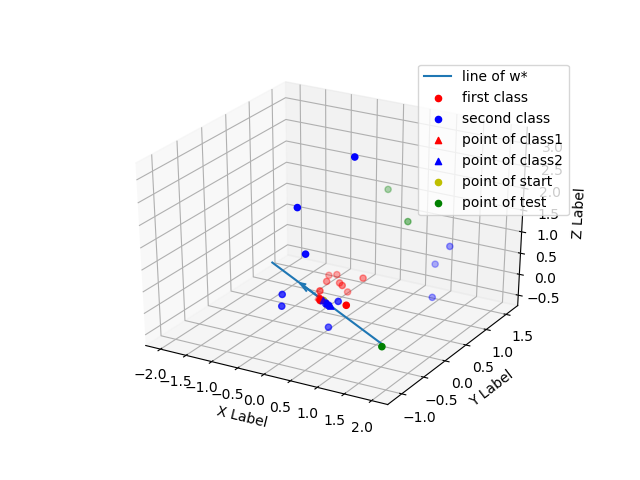

In [21]:
# 使图像可3D化旋转
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制两类点在空间的分布
x, y, z = get_xyz(X1, n[0])
#print(x, "\n\n", y, "\n\n",z)
# 绘点函数
ax.scatter(x, y, z, c = 'r',label = 'first class')    # 第一类用红点标出
x, y, z = get_xyz(X2, n[1])
#print(x, "\n\n", y, "\n\n",z)
ax.scatter(x, y, z, c = 'b',label = "second class")    # 第二类用蓝点标出

#ax.plot_trisurf(x, y, z)    # 根据点覆盖表面，底面中空

# 绘制最优方向w*的直线
p = (-W0[0, 0]) * ((W_star.T).I)  # g(x)=0的点，在方向直线上

x = np.linspace(-2, 2, 100)
y = W_star[1, 0] * (x - p[0, 0]) / W_star[0, 0] + p[1, 0]
z = W_star[2, 0] * (x - p[0, 0]) / W_star[0, 0] + p[2, 0]
ax.plot(x, y, z, label='line of w*')

# 绘制方向向量
# Make the grid 向量起点坐标
x, y, z = np.meshgrid(p[0, 0], p[1, 0], p[2, 0])
# Make the direction data for the arrows 向量
u = np.array(W_star[0,0])    # 这里与坐画点是一样的 一列代表一个向量
v = np.array(W_star[1,0])
w = np.array(W_star[2,0])
# 在3d画布中画出向量，不改变画面尺寸，length代表向量的模长, 标准化模长输出
ax.quiver(x, y, z, u, v, w, length=1, normalize=True)

# 绘制最优方向上对应的点
R = math.sqrt(W_star[0, 0] * W_star[0, 0] + W_star[1, 0]*W_star[1, 0] + W_star[2, 0]* W_star[2, 0])
# 第一类
x = np.zeros(n[0])
y = np.zeros(n[0])
z = np.zeros(n[0])
for i in range(n[0]):
    x[i] = ret1[i] * W_star[0, 0] / R
    y[i] = ret1[i] * W_star[1, 0] / R
    z[i] = ret1[i] * W_star[2, 0] / R
#    print(x[i], " ", y[i], " ", z[i])
ax.scatter(x, y, z, c = 'r', marker = "^", label = 'point of class1')
# 第二类
x = np.zeros(n[1])
y = np.zeros(n[1])
z = np.zeros(n[1])
for i in range(n[1]):
    x[i] = ret2[i] * W_star[0, 0] / R
    y[i] = ret2[i] * W_star[1, 0] / R
    z[i] = ret2[i] * W_star[2, 0] / R
#    print(x[i], " ", y[i], " ", z[i])
ax.scatter(x, y, z, c = 'b', marker = "^", label = 'point of class2')

# 绘制向量起点
ax.scatter(p[0, 0], p[1, 0], p[2, 0], c = 'y', label = "point of start")

# 绘制测试集的点
x = np.zeros(3)
y = np.zeros(3)
z = np.zeros(3)
for i in range(3):
    x[i] = test[i][0]
    y[i] = test[i][1]
    z[i] = test[i][2]
ax.scatter(x, y, z, c = 'g', label = "point of test")

ax.legend()  # 显示文字说明
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()